# TensorFlow 2.0 Keras API

## Classification Problem

### 1. Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = 'C:/Users/anyan/Documents/Documents/Python Courses/Py-DS-ML-Bootcamp-master/TensorFlow_FILES/DATA/'
file = 'lending_club_info.csv'
data_desc = pd.read_csv(path+file,index_col='LoanStatNew')
data_desc.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [3]:
data_desc.loc['loan_amnt']

Description    The listed amount of the loan applied for by t...
Name: loan_amnt, dtype: object

In [4]:
file = 'lending_club_loan_two.csv'
data = pd.read_csv(path+file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

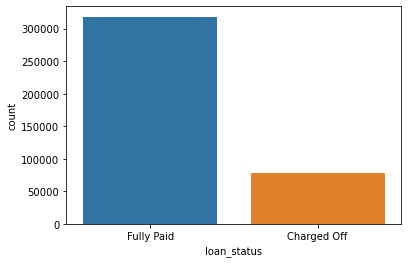

In [5]:
sns.countplot(x='loan_status',data=data)

roughly 1:3 ratio for fully paid vs. those who didn't or couldn't pay their loans

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

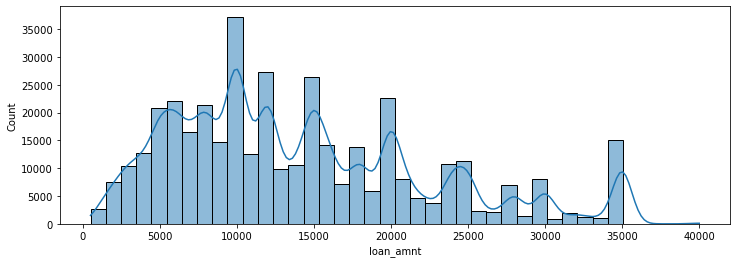

In [6]:
plt.figure(figsize=(12,4))
sns.histplot(data=data,x='loan_amnt',bins=40,kde=True)
#sns.distplot(data=data,x='loan_amnt',bins=40)

In [7]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

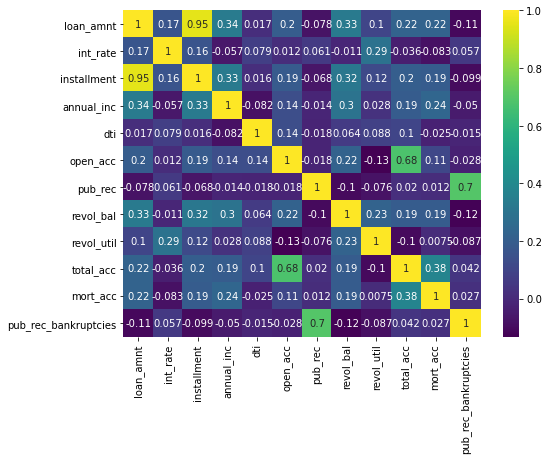

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='viridis',annot=True)

In [11]:
data_desc.loc['installment']

Description    The monthly payment owed by the borrower if th...
Name: installment, dtype: object

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

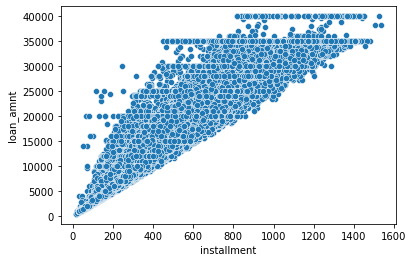

In [12]:
sns.scatterplot(x=data['installment'],y=data['loan_amnt'])

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

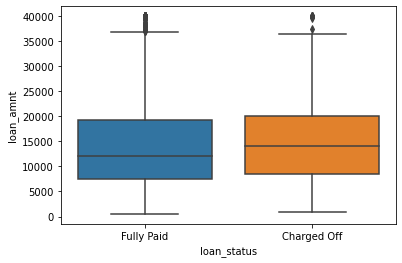

In [13]:
sns.boxplot(x=data["loan_status"],y=data["loan_amnt"])

In [37]:
data.groupby(['loan_status']).describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [64]:
#print(data['grade'].unique())
data['grade'].sort_values(axis=0).unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [63]:
data['sub_grade'].sort_values(axis=0).unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='Count'>

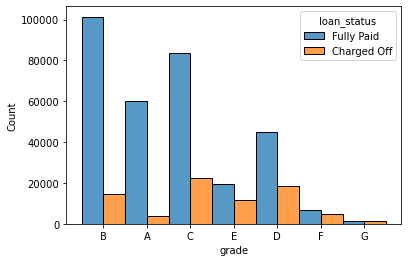

In [71]:
sns.histplot(data=data,x='grade',hue='loan_status',multiple="dodge")

(array([ 9729.,  9567., 10576., 15789., 18526., 19182.,     0., 22495.,
        26655., 25601., 22085., 23662., 22580.,     0., 21221., 20280.,
        18244., 15993., 13951.,     0., 12223., 11657.,  9700.,  7917.,
         7431.,  6207.,     0.,  5361.,  4572.,  3536.,  2766.,  2286.,
         1787.,     0.,  1397.,  1058.,   754.,   552.,   374.,   316.]),
 array([ 0.  ,  0.85,  1.7 ,  2.55,  3.4 ,  4.25,  5.1 ,  5.95,  6.8 ,
         7.65,  8.5 ,  9.35, 10.2 , 11.05, 11.9 , 12.75, 13.6 , 14.45,
        15.3 , 16.15, 17.  , 17.85, 18.7 , 19.55, 20.4 , 21.25, 22.1 ,
        22.95, 23.8 , 24.65, 25.5 , 26.35, 27.2 , 28.05, 28.9 , 29.75,
        30.6 , 31.45, 32.3 , 33.15, 34.  ]),
 <BarContainer object of 40 artists>)

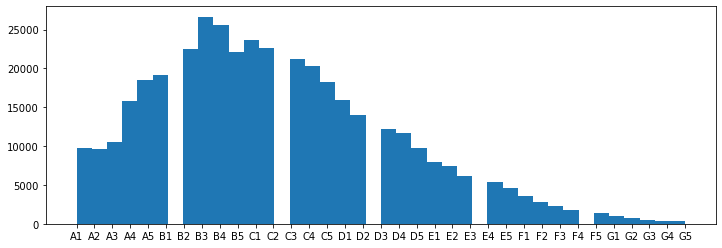

In [96]:
plt.figure(figsize=(12,4))
sns.histplot(data=data.sort_values(by='sub_grade',axis=0),x='sub_grade',multiple="dodge")
# plt.hist(data=data.sort_values(by='sub_grade',axis=0),x='sub_grade',bins=40)